<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/7_2DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망(DNN)

In [53]:
from tensorflow import keras #keras 패키지
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() #패션 MNIST 데이터셋 다운로드
#load_data() 메서드는 훈련 세트와 테스트 세트를 나누어 반환

In [54]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0 #이미지의 픽셀 값을 255로 나눠서 0~255인 값을 0~1 사이의 값으로 정규화
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

# 층 2개 추가
- 입력층과 출력층 사이에 밀집층(dense layer) 2개 추가 할거임
- 은닉층(hidden layer): 이렇게 입력층과 출력층 사이에 있는 모든 층
  - 분류 문제 일때 출력층에 적용할 수 있는 활성화 함수는 sigmoid, softmax 두가지
  - 은닉층에 적용할 수 있는 활성화 함수는 비교적 자유로움

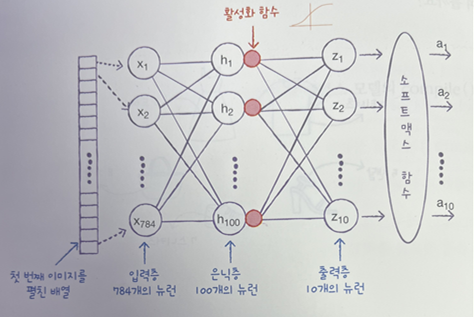

# 왜 hidden layer에 activation function을 적용할까?
- 선형 계산을 적당히 비 선형적으로 비틀어 주기 위해
  - 왜 비틀어 주어야하지?
    - 은닉층에서 선형 계산만 하면 수행 역할이 없는 셈이다.

    - ex) a x 4 + 2 = b, b x 3 - 5 = c이 두 선형 방정식은 a x 12 + 1 = c나 마찬가지이다.
    - 하지만 a x 4 + 2 = b라는 선형 방정식에 log(b) = k라는 활성화 함수를 적용하면, k x 3 - 5 = c가 된다. 이렇게 이전 층의 정보를 다음 층으로 전달할 수 있게됨

주로 sigmoid function을 은닉층의 활성화 함수로 사용한다.

$\sigma(x) = \frac{1}{1 + e^{-x}}$
- 이 함수는 뉴런의 출력 z 값을 0~1 사이의 값으로 압축한다.

<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1148/342217234.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma(x)$')


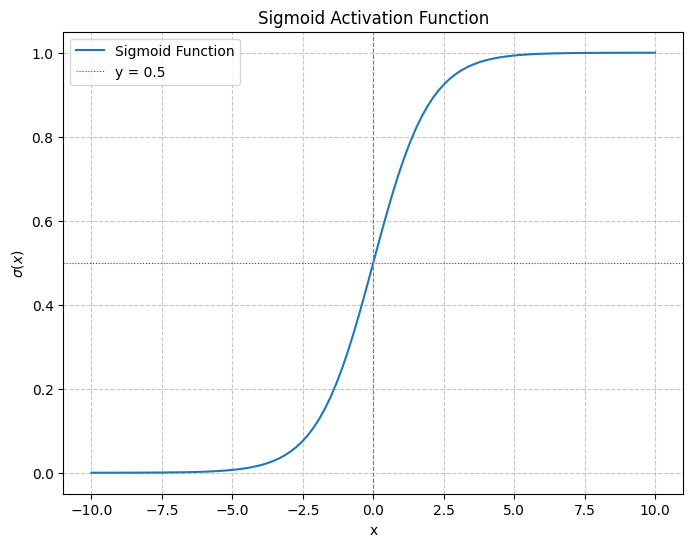

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0.5, color='red', linestyle=':', linewidth=0.8, label='y = 0.5')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()


In [56]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', name = 'hidden', input_shape = (784, )) #100개의 뉴런을 가진 은닉층
#은닉층의 뉴런의 개수를 정하는데는 특별한 기준이 없다. 경험으로 판단해야함
#But 적어도 출력층의 뉴런 보다는 많게 만들어야한다.
dense2 = keras.layers.Dense(10, activation='softmax', name = 'output') #출력층
#name 매개변수로 층 이름 설정

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 심층 신경망 만들기(2개 이상의 층을 포함한 신경망)

In [57]:
model = keras.Sequential([dense1, dense2])#여러 층을 추가할 땐 이렇게 리스트로 만들어서 전달, 출력층은 꼭 마지막에!

In [58]:
model.summary() #summary(): 층에 대한 유용한 정보 확인 가능

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

층 이름, 클래스, 출력 크기, 모델 파라미터 개수 등이 출력
- **hidden 층의 출력크기: (None, 100)**
  - **(None, 100)에서 첫 번째 차원은 샘플의 개수를 나타낸다. 여기서 None은 머하는놈일까?**
  - keras의 fit() 메서드는 미니배치 경사하강법을 사용함
  - 따라서 **샘플 개수를 고정하지 않고 어떤 배치 크기에도 대응할 수 있도록 None으로 설정**
  - 이렇게 신경망 층에 입력되거나 출력되는 배열의 첫 번째 차원을 **"배치차원"**이라고 부름
  - 두번 째 차원인 100은 출력의 개수이다. 뉴런이 100개니 출력도 100개인셈
- **모델 파라미터 개수**
  - **hidden 층의 모델 파라미터 개수 = 78,500**
    - 784(입력 픽셀 개수) * 100(뉴런 개수) + 100(뉴런마다 하나씩 있는 절편 개수) = 78,500
  - **output 층의 모델 파라미터 개수 = 1,010**
    - 100(100개의 은닉층 뉴런 개수)  * 10(출력층 뉴런 개수) + 10(뉴런 마다 하나씩 있는 절편 개수) = 1,010

In [59]:
#사실 앞서 만든 dense1, dense2는 변수로 만들어놔도 따로 쓸일이 없어서 이렇게 Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체를 만드는 경우가 많음
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ), name = 'hidden'),
    keras.layers.Dense(10, activation='softmax', name = 'output')
], name = '패션 MNIST 모델')

In [60]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
#이 방법도 층이 너무 많아지면 코드가 길어져서 add() 쓰는게 맘편함
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ), name = 'hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name = 'output'))

In [62]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

**위에 3가지 모델은 층 추가 방식만 다르지 다 같은 모델**

In [63]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7572 - loss: 0.7643
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8491 - loss: 0.4189
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8616 - loss: 0.3815
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8694 - loss: 0.3576
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8782 - loss: 0.3347


sigmoid 함수는 층이 깊어질 수록 활성화 함수의 양쪽 끝에서 변화가 작기 때문에 학습이 어려워진다.

그래서 층이 깊을 때는 relu 함수를 활성화 함수로 사용한다.

# ReLU (Rectified Linear Unit) 함수

ReLU 함수는 비선형 활성화 함수로, 특히 은닉층에서 많은 신경망 유형의 기본 활성화 함수가 되었습니다.

이미지 분류 모델의 은닉층에 많이 사용됩니다.

수학적 공식:

$f(x) = \max(0, x)$

이는 다음을 의미합니다:

**입력이 양수일 경우 그냥 입력을 통과시키고, 입력이 음수일 경우 0으로 만들어버립니다.**

주요 특징 및 장점:

**경사 소실 문제 해결**: 시그모이드 및 tanh와 달리 ReLU는 양수 입력에 대해 포화되지 않습니다. 즉, 양수 입력에 대해 기울기는 항상 1이며, 이는 경사 소실 문제를 방지하고 모델이 더 빠르고 더 나은 성능으로 학습할 수 있도록 돕습니다.
계산 효율성: ReLU는 계산이 매우 간단하여 (max 연산만 수행) 훈련 및 추론 중에 계산 효율적입니다.

**희소성 (Sparsity)**: 음수 입력에 대해 ReLU는 0을 출력하므로 은닉층에서 희소 활성화를 유도합니다. 이는 모델을 계산 효율적으로 만들고 과적합에 덜 취약하게 만들 수 있습니다.

단점:

**죽은 ReLU 문제 (Dying ReLU Problem)**: 음수 입력에 대해 기울기는 0입니다. 이는 한 번 뉴런이 0을 출력하면, 해당 뉴런을 통과하는 어떤 데이터 포인트에 대해서도 다시 활성화되지 않을 수 있어, 사실상 '죽은' 뉴런이 됩니다. 이는 모델의 용량을 감소시킬 수 있습니다.
죽은 ReLU 문제에도 불구하고, 적절한 초기화 및 학습률과 함께 사용될 때 그 장점은 단점을 능가하는 경우가 많습니다. 죽은 ReLU 문제를 해결하기 위해 Leaky ReLU 및 ELU와 같은 변형이 개발되었습니다.

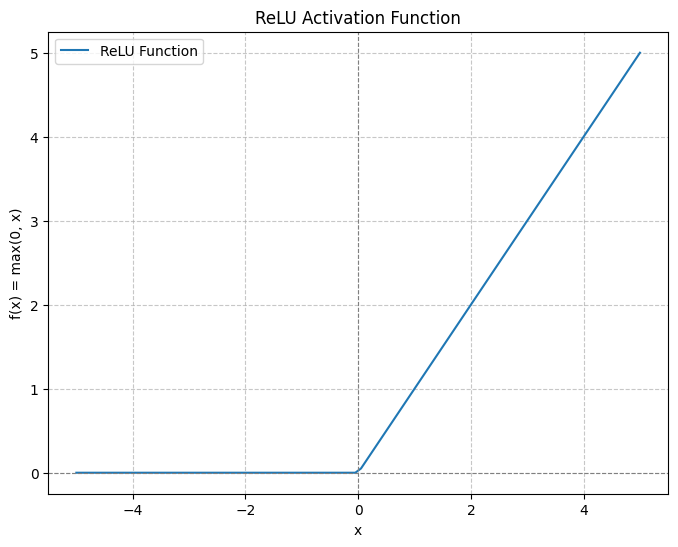

In [64]:
#Relu 함수 그래프
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-5, 5, 100)
y = relu(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU Function')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('f(x) = max(0, x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()


In [65]:
#입력층과 은닉층 사이에 Flatten층 추가
#Flatten 층은 앞 절에서 reshape()를 이용해서 1차원 배열로 펼치는것을 대신 해주는 아주 고마운 친구임
#배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 하긴 하지만 Flatten 클래스를 층 처럼 입력층과 은닉층 사이에 추가하기 때문에 Flatten 층이라고 부름
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28))) #input_shape 매개 변수를 Flatten 층으로 옮김
model.add(keras.layers.Dense(100, activation = 'relu')) # 활성화 함수를 relu로 바꿈
model.add(keras.layers.Dense(10, activation = 'softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.summary() #Flatten 층 덕분에 입력값의 차원을 쉽게 알 수 있음

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() #패션 MNIST 데이터셋 다운로드
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [68]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs = 5) #relu 함수로 활성화 함수를 바꾼 덕에 정확도가 약간 향상된 모습

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7649 - loss: 0.6726
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8583 - loss: 0.3976
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8695 - loss: 0.3540
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8817 - loss: 0.3337
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8889 - loss: 0.3105


딥러닝에는 은닉층의 개수, 은닉층의 뉴런 개수, 활성화 함수, 층의 종류, 미니 배치의 개수, epochs 매개변수, 사용할 경사 하강법 알고리즘, 경사 하강법의 학습률 등 굉장히 많은 하이퍼 파라미터들이 존재한다

# 옵티마이저(optimizer)
- keras 가 제공하는 다양한 종류의 경사 하강법 알고리즘(얘네도 하이퍼 파라미터에 속함)
- keras의 기본 경사 하강법 알고리즘은 RMSprop

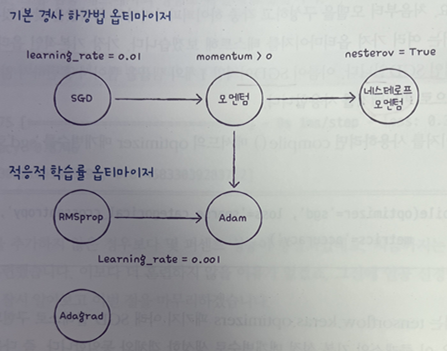

In [69]:
# 가장 기본이 되는 SGD 옵티마이저 사용
# 이름은 SGD 지만 미니배치를 사용하여 훈련함
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics = ['accuracy']) #optimizer 매개변수로 사용할 옵티마이저 지정

In [70]:
#위의 코드와 동일
#이 코드가 SGD 클래스 객체 만들어서 사용하는 정석이긴한데 번거로움을 피하기 위해 위의 코드 처럼 작성 시 자동으로 SGD 클래스 객체 생성되게 만듦
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [71]:
#SGD 학습률 지정
sgd = keras.optimizers.SGD(learning_rate=0.1) #기본 값 = 0.01

In [72]:
# 모멘텀 최적화(momentum optimization): 이전의 그레이디언트르르 가속도처럼 사용, SGD 클래스의 momentum 매개변수를 0보다 큰 값으로 지정(보통 0.9 이상)
# 네스테로프 모멘텀 최적화(nesterov momentum optimization): 모멘텀 최적화를 2번 반복하여 구현, nesterov 매개변수를 True로 지정
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

**모델의 최적점에 가까이 갈수록 학습률을 낮출 수 있습니다**. 이렇게 하면 안정적으로 최적점에 수렴할 가능성이 높습니다.

이런 학습률을 **적응적 학습률(adaptive learning rate)**라고 합니다. 이런 방식은 학습률 매개변수를 튜닝하는 수고를 덜 수 있습니다.

adaptive learning rate를 사용하는 대표적인 옵티마이저
- Adagrad: 그레이디언트 제곱을 누적하여 학습률을 나눕니다. initial_accumulator_value 매개변수에서 누적 초깃 값을 지정할 수 있다. 기본 값은 0.1입니다.
- rmsprop(optimizers 매개 변수의 기본값): Adagrad처럼 그레이디언트 제곱으로 학습률을 나누지만, 최근의 그레이디언트를 사용하기 위해 지수 감소를 사용합니다. rho 매개 변수에서 감소 비율을 지정하며 기본 값은 0.9입니다.
- Adam: momentum optimization과 RMSprop의 장점을 접목하였습니다. 모멘텀 최적화에 있는 그레이디언트 지수 감소 평균을 조절하기 위해 beta_1 매개변수가 있으며 기본 값은 0.9입니다. RMSprop에 있는 그레이디언트 제곱의 지수 감소 평균을 조절하기 위해 beta_2매개 변수가 있으며 기본 값은 0.999입니다.
- 위의 세 클래스 모두 learning_rate 매개변수로 학습률을 지정하며 기본 값은 0.001입니다.

In [73]:
#adagrad 옵티마이저
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [74]:
#RMSprop 옵티마이저
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [76]:
#Adam 옵티마이저
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=5) #기본 RMSprop 때와 비슷한 성능

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7651 - loss: 0.6803
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8556 - loss: 0.4041
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8702 - loss: 0.3651
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8794 - loss: 0.3303
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8851 - loss: 0.3118


In [77]:
model.evaluate(val_scaled, val_target) #검증 세트에선

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8788 - loss: 0.3393


[0.34158259630203247, 0.8773333430290222]